In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Language analysis

In [2]:
df = pd.read_csv('words_with_translation_corrected.csv', sep = ';', parse_dates= True)

In [3]:
df = df.replace('German', 'german')

In [4]:
df.head()

,date,word,language,month,Leo_months,en_word
0,2020-08-07,Mama,neutral,2020-08,9,Mama
1,2020-09-24,agua,spanish,2020-09,11,Water
2,2020-10-07,Abuela,spanish,2020-10,11,Grandmother
3,2020-10-31,luna,spanish,2020-10,12,Moon
4,2020-11-05,Banane,german,2020-11,12,banana


### Color dictionary

In [82]:
colors = ['#F28123','#0099ab','#82A0BC']

In [83]:
colors_dic = {'spanish':'#F28123', 'german':'#0099ab', 'neutral':'#82A0BC'}

In [84]:
colors_dic['spanish']

'#F28123'

### Language distribution of total words

Done in other notebook.

### Same words different language

- Translate all to english: done
    - Check & correct: done
- Find duplicates:
    - also tells y
- Check how often spa/ger were first
    - make hypothesis on why?
- Plot in distance with arcs connecting

In [5]:
len(df.word.unique())

946

In [6]:
df = df.drop_duplicates(subset= 'word', keep = 'first')

In [7]:
df.en_word = df.en_word.str.lower()

In [8]:
len(df.en_word.unique())

805

In [14]:
df[df.duplicated(subset = 'en_word', keep = False)].sort_values(by = ['date'])

,date,word,language,month,Leo_months,en_word
1,2020-09-24,agua,spanish,2020-09,11,water
2,2020-10-07,Abuela,spanish,2020-10,11,grandmother
3,2020-10-31,luna,spanish,2020-10,12,moon
6,2020-11-18,Ball,german,2020-11,13,ball
8,2020-11-23,no,spanish,2020-11,13,no
...,...,...,...,...,...,...
981,2022-01-14,ándale,spanish,2022-01,26,come along
991,2022-01-16,Welt,german,2022-01,26,world
994,2022-01-16,paja,spanish,2022-01,26,straw
990,2022-01-16,weit,german,2022-01,26,far


In [9]:
duplicated_concepts = df[df.duplicated(subset = 'en_word', keep = False)].sort_values(by = ['date'])

In [18]:
concepts = df[df.duplicated(subset = 'en_word', keep = False)].sort_values(by = ['date'])['en_word'].unique()

In [19]:
word_order = np.arange(len(df[df.duplicated(subset = 'en_word', keep = 'first')]))+1

In [20]:
word_order_dict = dict(zip(concepts,word_order))

In [21]:
duplicated_concepts

,date,word,language,month,Leo_months,en_word
1,2020-09-24,agua,spanish,2020-09,11,water
2,2020-10-07,Abuela,spanish,2020-10,11,grandmother
3,2020-10-31,luna,spanish,2020-10,12,moon
6,2020-11-18,Ball,german,2020-11,13,ball
8,2020-11-23,no,spanish,2020-11,13,no
...,...,...,...,...,...,...
981,2022-01-14,ándale,spanish,2022-01,26,come along
991,2022-01-16,Welt,german,2022-01,26,world
994,2022-01-16,paja,spanish,2022-01,26,straw
990,2022-01-16,weit,german,2022-01,26,far


In [22]:
duplicated_concepts['order'] = duplicated_concepts['en_word'].map(word_order_dict)

In [23]:
duplicated_concepts.sort_values(by = 'order').head()

,date,word,language,month,Leo_months,en_word,order
1,2020-09-24,agua,spanish,2020-09,11,water,1
100,2021-04-22,Wasser,german,2021-04,18,water,1
42,2021-02-15,Oma,german,2021-02,15,grandmother,2
2,2020-10-07,Abuela,spanish,2020-10,11,grandmother,2
3,2020-10-31,luna,spanish,2020-10,12,moon,3


In [24]:
duplicated_concepts.loc[duplicated_concepts['language'] == 'neutral']

,date,word,language,month,Leo_months,en_word,order
61,2021-03-15,bubbles,neutral,2021-03,16,bubbles,23
117,2021-04-30,bye,neutral,2021-04,18,bye,13


In [42]:
word = 'water'

In [55]:
# y axis

In [53]:
duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].order

1

In [ ]:
#x start

In [56]:
duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].Leo_months

11

In [ ]:
# x end

In [57]:
duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[1].Leo_months

18

In [74]:
duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].language

'spanish'

In [75]:
colors_dic[duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].language]

'#F28123'

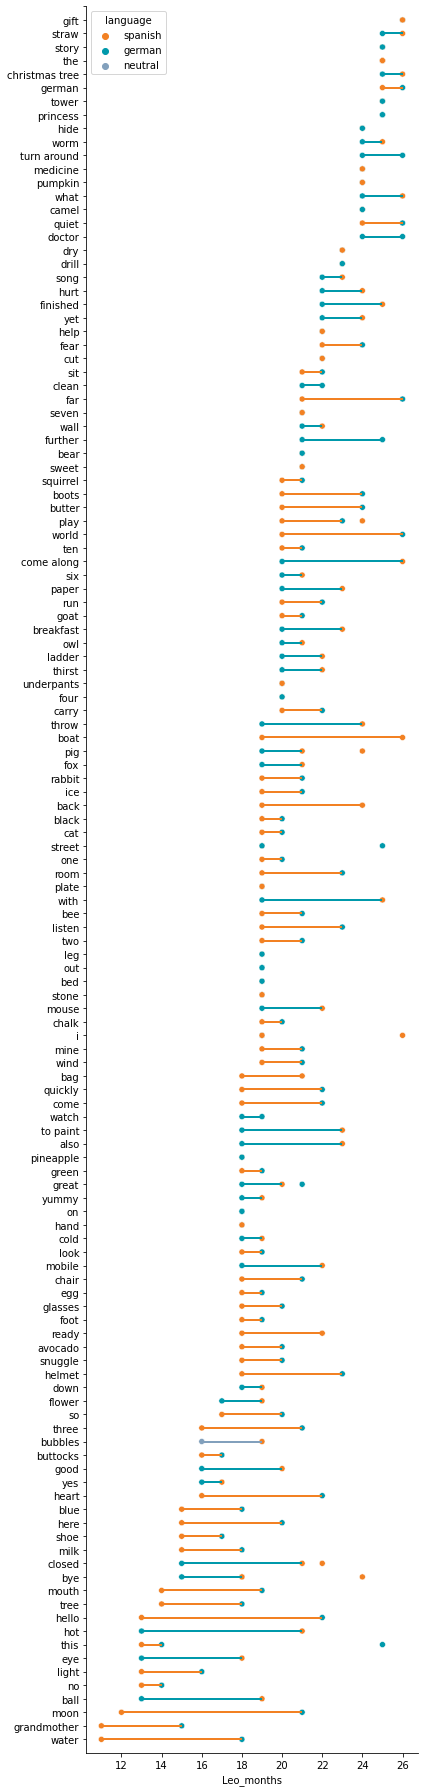

In [89]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (6,25))
ax = sns.scatterplot(data = duplicated_concepts, 
               x = 'Leo_months', 
               y = 'order', 
               hue = 'language',
               palette = colors)

major_ticks = np.arange(1, 130, 1)

ax.set_ylim(0, 128)
ax.set_yticks(major_ticks)
ax.set_yticklabels(concepts)
ax.set_ylabel("")

# And a corresponding grid
#ax.grid(which='major', axis = 'y')
sns.despine()

word = 'water'
for word in concepts:
    y = duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].order
    x_start = duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].Leo_months
    x_end = duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[1].Leo_months
    color = colors_dic[duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].language]
    ax.hlines(y, x_start, x_end, color, linewidth=2)

plt.tight_layout()
plt.savefig('concepts_first_language.png')

### Expansion of semantic space

- Get word vectors for every word
    - Q: What to do with compound words? 'Get out?'
        - Take average?
        - Use both?
- Make PCA 
+ Clustering?
    - Hopefully identify clear groups
- Plot in time
    - and with the language used